<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [13]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [14]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [15]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [16]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Task: For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'MEDV box plot')

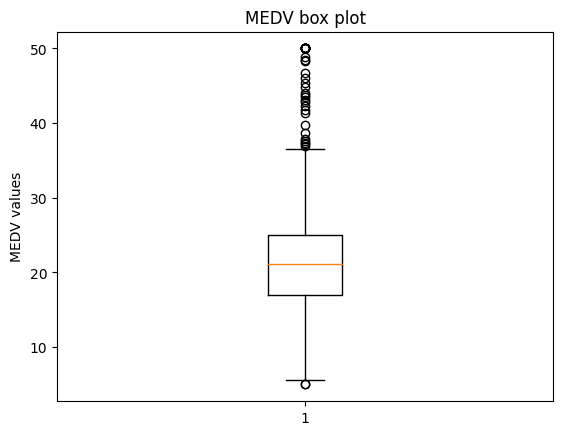

In [70]:
pyplot.boxplot(boston_df["MEDV"])
pyplot.ylabel("MEDV values")
pyplot.title("MEDV box plot")

Task: Provide a  bar plot for the Charles river variable

Text(0, 0.5, 'CHAS value')

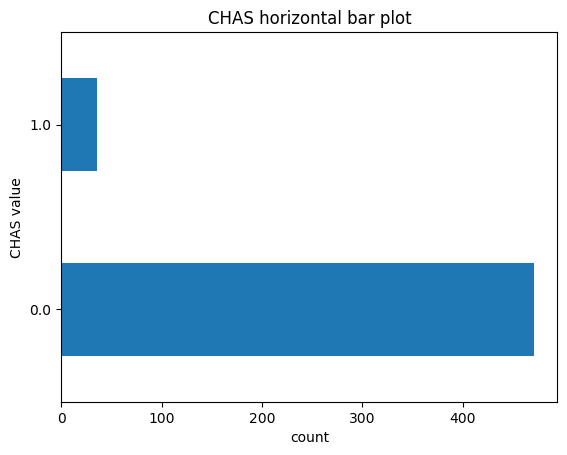

In [69]:
ax = boston_df["CHAS"].value_counts().plot(kind = "barh", title = "CHAS horizontal bar plot")
ax.set_xlabel("count")
ax.set_ylabel("CHAS value")

Task: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older). I use to use cut to make it descrete.


Text(0.5, 1.0, 'MEDV box plots for different Age buckets')

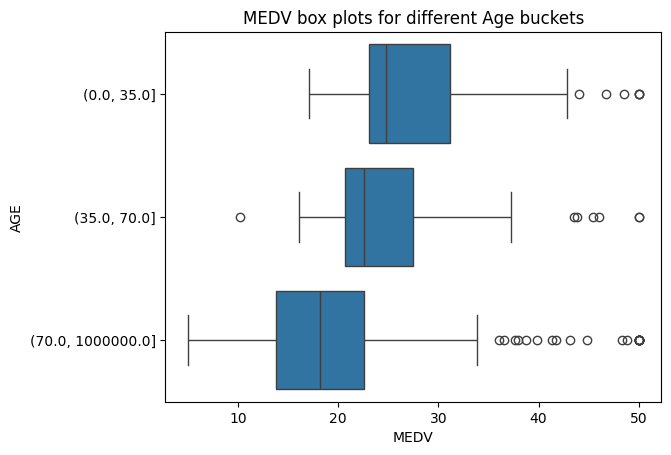

In [72]:
age_buckets = pd.cut(boston_df["AGE"], [0,35, 69.9999, 1000000])
sns.boxplot(x=boston_df["MEDV"], y=age_buckets).set_title("MEDV box plots for different Age buckets")

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 


Text(0.5, 1.0, 'scatter plot: NOX vs INDUS')

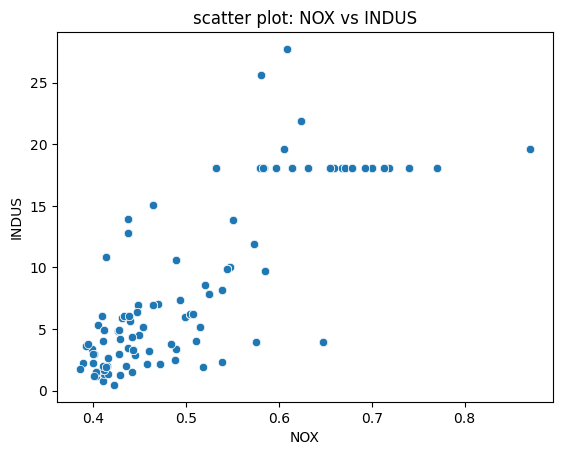

In [73]:
sns.scatterplot(x=boston_df["NOX"], y=boston_df["INDUS"]).set_title("scatter plot: NOX vs INDUS")

Q: What can you say about the relationship?
A: They are positivelz correlated, if one is above the mean, the other is as well.

Task: Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'histogram of PTRATIO')

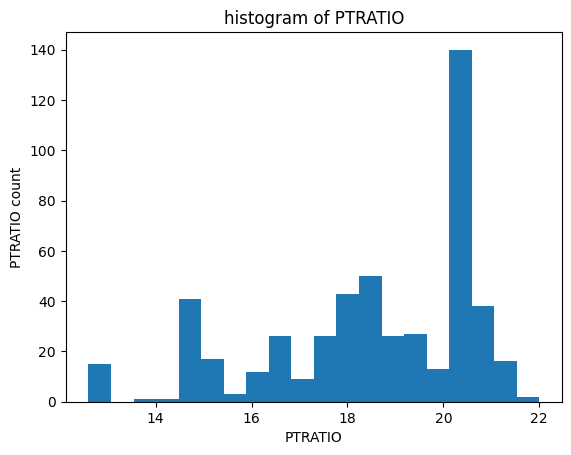

In [76]:
pyplot.hist(boston_df["PTRATIO"], bins=20)
pyplot.ylabel("PTRATIO count")
pyplot.xlabel("PTRATIO")
pyplot.title("histogram of PTRATIO")

Task: Q: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [29]:
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"]==0]["MEDV"], boston_df[boston_df["CHAS"]==1]["MEDV"])

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

A: Yes there is, the p value is << 0.05. We can thus reject the null hypothesis that they are the same.

Q: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Given we use ANOVA, I first decretize Age as in the task before. 


In [56]:
age_bins = [boston_df[boston_df["AGE"]<=35]["MEDV"],
            boston_df[(boston_df["AGE"]>35)&(boston_df["AGE"]<=70)]["MEDV"],
            boston_df[boston_df["AGE"]>70]["MEDV"]]
scipy.stats.f_oneway(*age_bins)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

A: The p value is tiny and clearly below 0.05, we thus can reject the null hypothesis that all means are the same as it is already different for these buckets.

Q: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [61]:
scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

A: The correlation coefficient is 0.76 with a p value well below 0.05. We thus can reject the hypothesis that there is no relation between these two variables.

Q: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [50]:
y=boston_df["MEDV"]
x=boston_df["DIS"]
x = sm.add_constant(x)
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        16:37:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

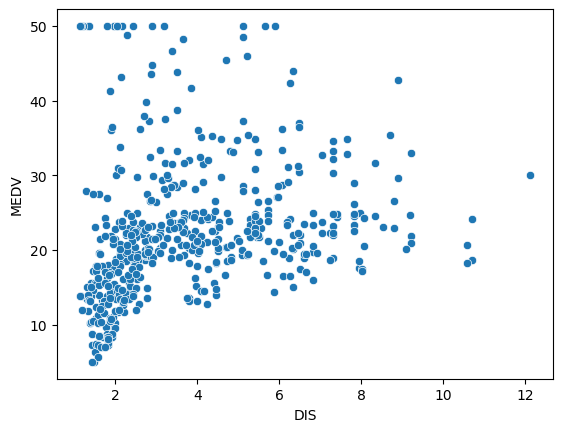

In [49]:
# plot for sanity check
sns.scatterplot(x=boston_df["DIS"], y=boston_df["MEDV"])

Yep, makes sense that R squared is not too big.
A: Only 6.2% of the variation in the MEDV values can be accounted for by the DIS values, if a regression is used. See R squared. As the p values is below 0.05, we can say this with confidence